In [13]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.datasets import make_blobs
from networkx import random_shell_graph
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification, load_breast_cancer, fetch_openml, load_iris, fetch_california_housing
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score, f1_score
from sklearn.linear_model import Perceptron
import time
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.metrics import confusion_matrix

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


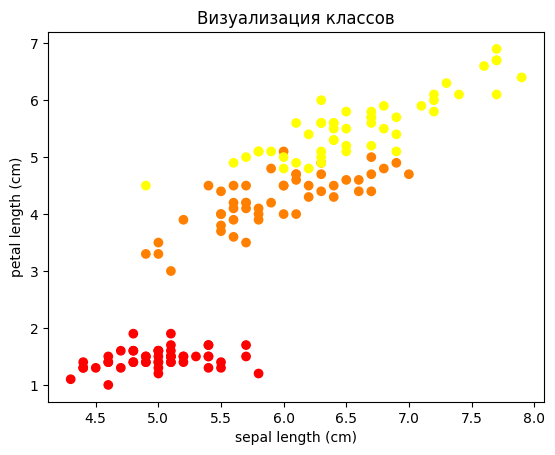

In [4]:
iris = load_iris()
features = iris.data

data = pd.DataFrame(features, columns = iris.feature_names)
print(data.head())

X = data.iloc[:, [0, 2]]
y = iris.target
X.shape, y.shape

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='autumn')

plt.title("Визуализация классов")
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()

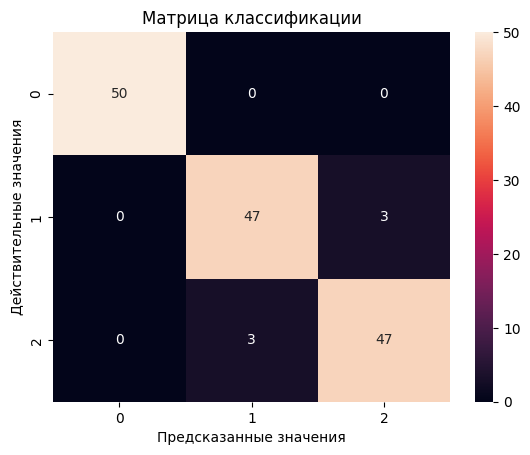

In [9]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_scaled, y)

y_pred = knn.predict(X_scaled)

plt.title("Матрица классификации")
sns.heatmap(confusion_matrix(y, y_pred), annot=True, fmt ='d')
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


<function matplotlib.pyplot.show(close=None, block=None)>

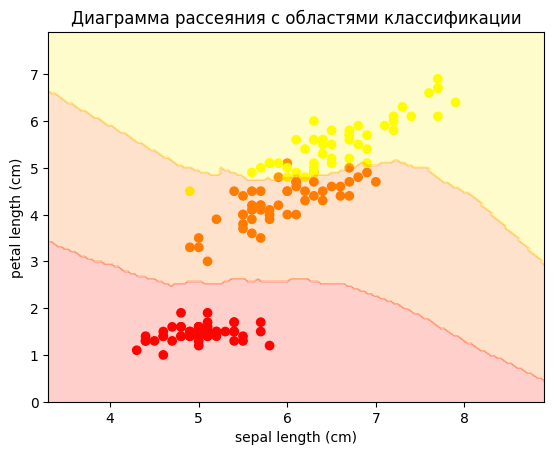

In [11]:
X0 = np.linspace(X.iloc[:, 0].min()-1,X.iloc[:, 0].max()+1, X.shape[0])
X1 = np.linspace(X.iloc[:, 1].min()-1,X.iloc[:, 1].max()+1, X.shape[0])

X0_grid, X1_grid = np.meshgrid(X0, X1)

XX = np.array([X0_grid.ravel(), X1_grid.ravel()]).T

XX_scaled = scaler.transform(XX)
Z = knn.predict(XX_scaled).reshape(X0_grid.shape)

plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='autumn')
plt.contourf(X0_grid, X1_grid, Z, cmap='autumn', alpha=0.2)

plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.title("Диаграмма рассеяния с областями классификации")
plt.show

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


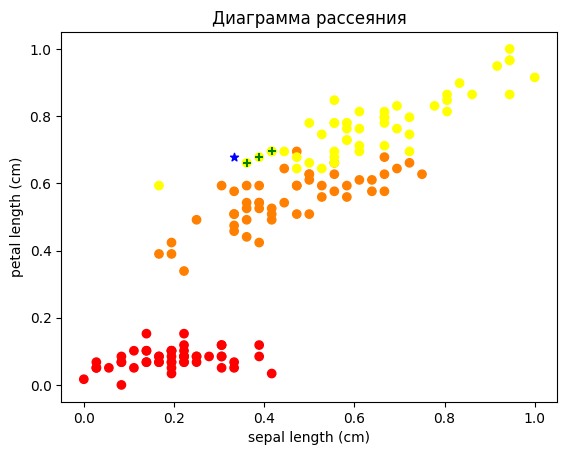

In [12]:
observation_new = [[5.5, 5]]
observation_new_scaled = scaler.transform(observation_new)
knn.predict(observation_new_scaled)
knn.predict_proba(observation_new_scaled)
distances, indices = knn.kneighbors(observation_new_scaled)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='autumn')

plt.scatter(observation_new_scaled[0][0], observation_new_scaled[0][1], marker='*', color='b')

plt.scatter(X_scaled[indices[0]][0][0], X_scaled[indices[0]][0][1], marker='+', color='g')
plt.scatter(X_scaled[indices[0]][1][0], X_scaled[indices[0]][1][1], marker='+', color='g')
plt.scatter(X_scaled[indices[0]][2][0], X_scaled[indices[0]][2][1], marker='+', color='g')

plt.title("Диаграмма рассеяния")
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()

**Постройте последний график методических указаний в исходном пространстве признаков.**

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


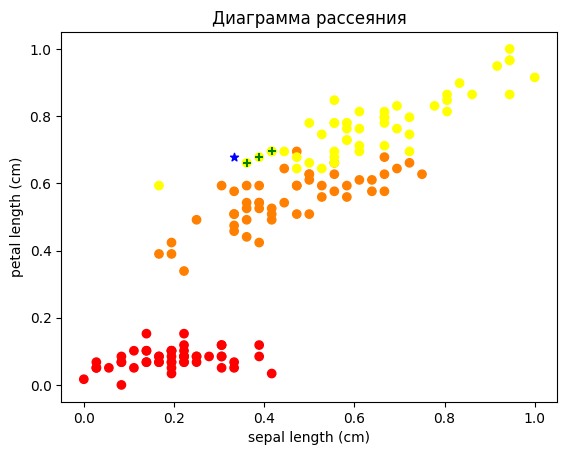

In [14]:
observation_new = [[5.5, 5]]
observation_new_scaled = scaler.transform(observation_new)
distances, indices = knn.kneighbors(observation_new_scaled)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='autumn')

plt.scatter(observation_new_scaled[0][0], observation_new_scaled[0][1], marker='*', color='b')

plt.scatter(X_scaled[indices[0]][0][0], X_scaled[indices[0]][0][1], marker='+', color='g')
plt.scatter(X_scaled[indices[0]][1][0], X_scaled[indices[0]][1][1], marker='+', color='g')
plt.scatter(X_scaled[indices[0]][2][0], X_scaled[indices[0]][2][1], marker='+', color='g')

plt.title("Диаграмма рассеяния")
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()

**Попробуйте обучить модель с другим значением k. Визуализируйте области классификации и сравните эффективности модели.**

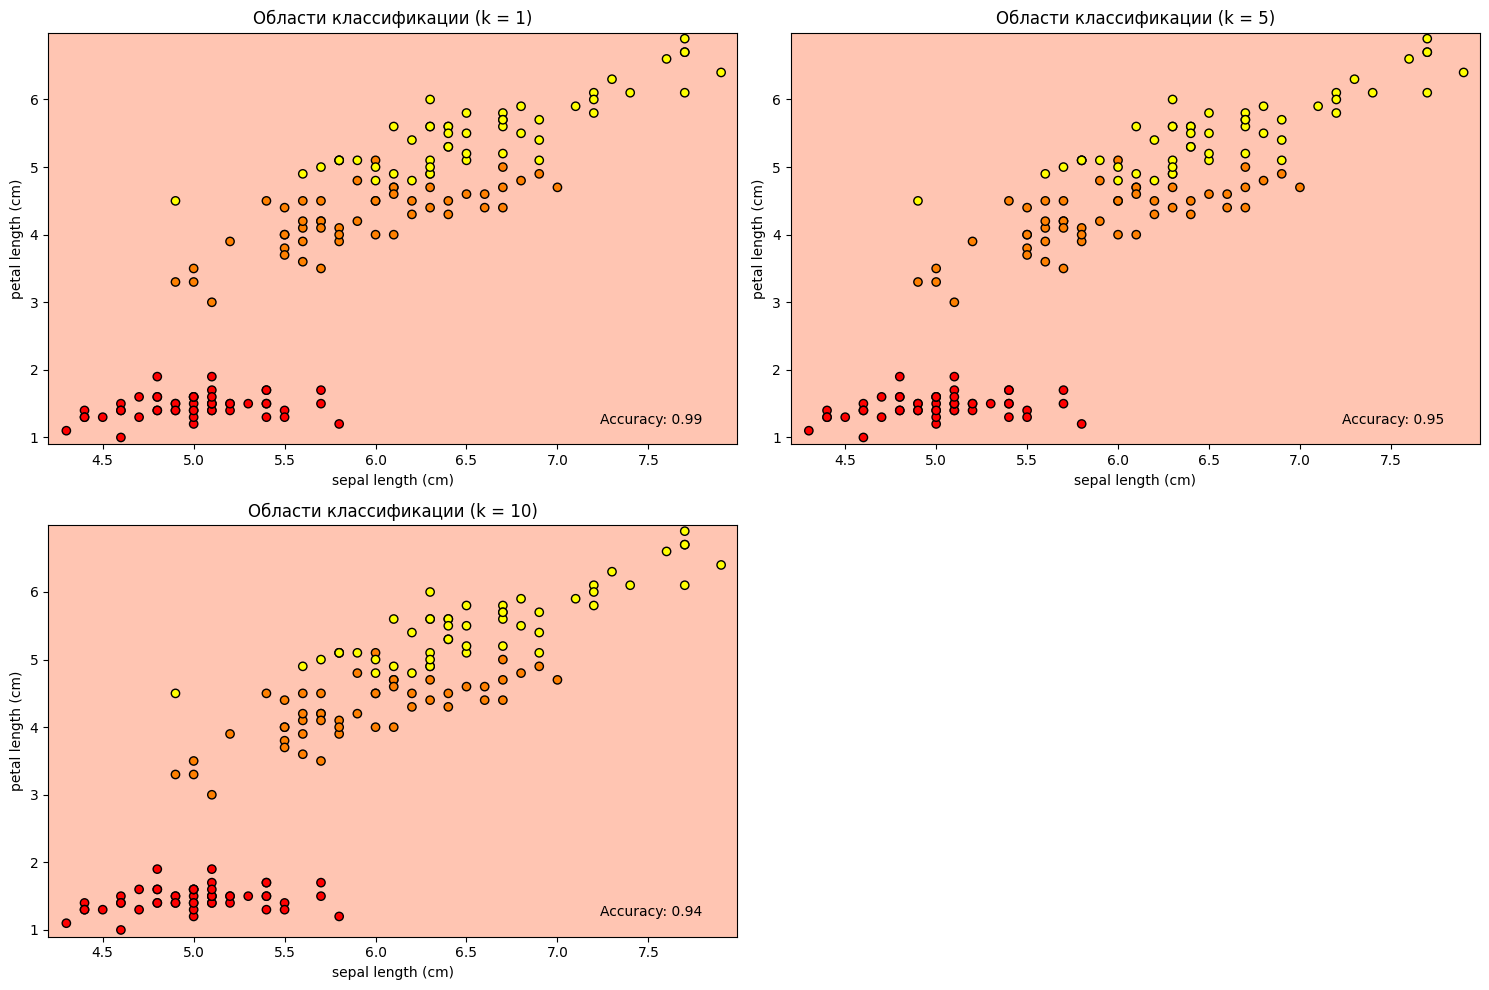

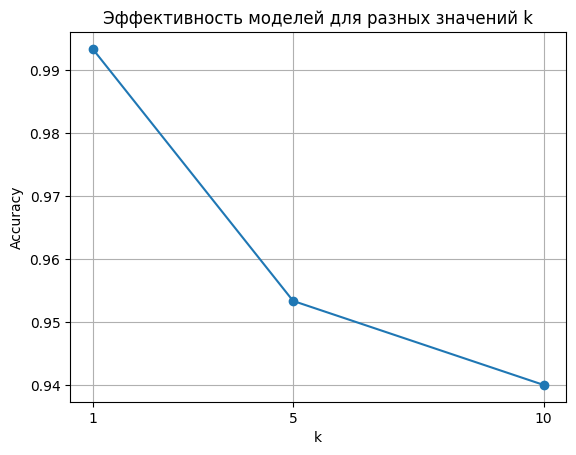

In [15]:
iris = load_iris()
X = iris.data[:, [0, 2]]  # Выбираем первый и третий признак
y = iris.target

# Масштабирование признаков
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Значения k, которые мы хотим использовать
k_values = [1, 5, 10]
accuracies = []

# Создание сетки для визуализации областей классификации
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Обучение моделей и визуализация результатов
plt.figure(figsize=(15, 10))
for i, k in enumerate(k_values, start=1):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_scaled, y)

    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.subplot(2, 2, i)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='autumn')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn', edgecolors='k')
    plt.title("Области классификации (k = {})".format(k))
    plt.xlabel('sepal length (cm)')
    plt.ylabel('petal length (cm)')

    # Вычисление эффективности модели
    y_pred = knn.predict(X_scaled)
    accuracy = accuracy_score(y, y_pred)
    accuracies.append(accuracy)
    plt.text(0.8, 0.05, 'Accuracy: {:.2f}'.format(accuracy), transform=plt.gca().transAxes)

plt.tight_layout()

plt.figure()
plt.plot(k_values, accuracies, marker='o')
plt.title('Эффективность моделей для разных значений k')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

**Подвигайте новое наблюдение в последнем пункте методических указаний. Сдвиньте его за пределы области определения выборки. Как меняется нормализованное значение?**

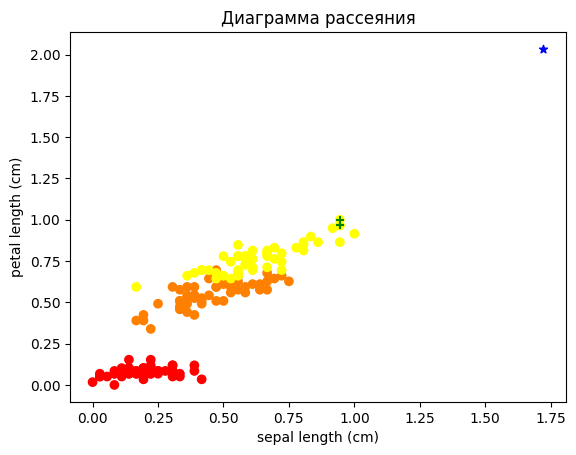

In [16]:
observation_new = [[10.5, 13]]
observation_new_scaled = scaler.transform(observation_new)
distances, indices = knn.kneighbors(observation_new_scaled)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='autumn')

plt.scatter(observation_new_scaled[0][0], observation_new_scaled[0][1], marker='*', color='b')

plt.scatter(X_scaled[indices[0]][0][0], X_scaled[indices[0]][0][1], marker='+', color='g')
plt.scatter(X_scaled[indices[0]][1][0], X_scaled[indices[0]][1][1], marker='+', color='g')
plt.scatter(X_scaled[indices[0]][2][0], X_scaled[indices[0]][2][1], marker='+', color='g')

plt.title("Диаграмма рассеяния")
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()

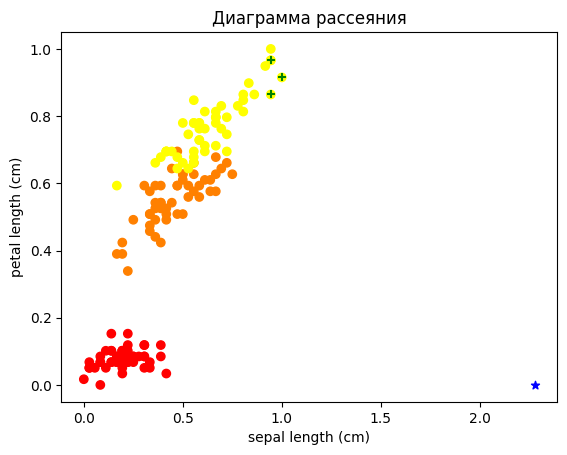

In [17]:
observation_new = [[12.5, 1]]
observation_new_scaled = scaler.transform(observation_new)
distances, indices = knn.kneighbors(observation_new_scaled)

plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap='autumn')

plt.scatter(observation_new_scaled[0][0], observation_new_scaled[0][1], marker='*', color='b')

plt.scatter(X_scaled[indices[0]][0][0], X_scaled[indices[0]][0][1], marker='+', color='g')
plt.scatter(X_scaled[indices[0]][1][0], X_scaled[indices[0]][1][1], marker='+', color='g')
plt.scatter(X_scaled[indices[0]][2][0], X_scaled[indices[0]][2][1], marker='+', color='g')

plt.title("Диаграмма рассеяния")
plt.xlabel('sepal length (cm)')
plt.ylabel('petal length (cm)')
plt.show()

**Поэкспериментируйте с разными метриками расстояния. Визуализируйте ближайших соседей нового объекта при разных метриках расстояния.**

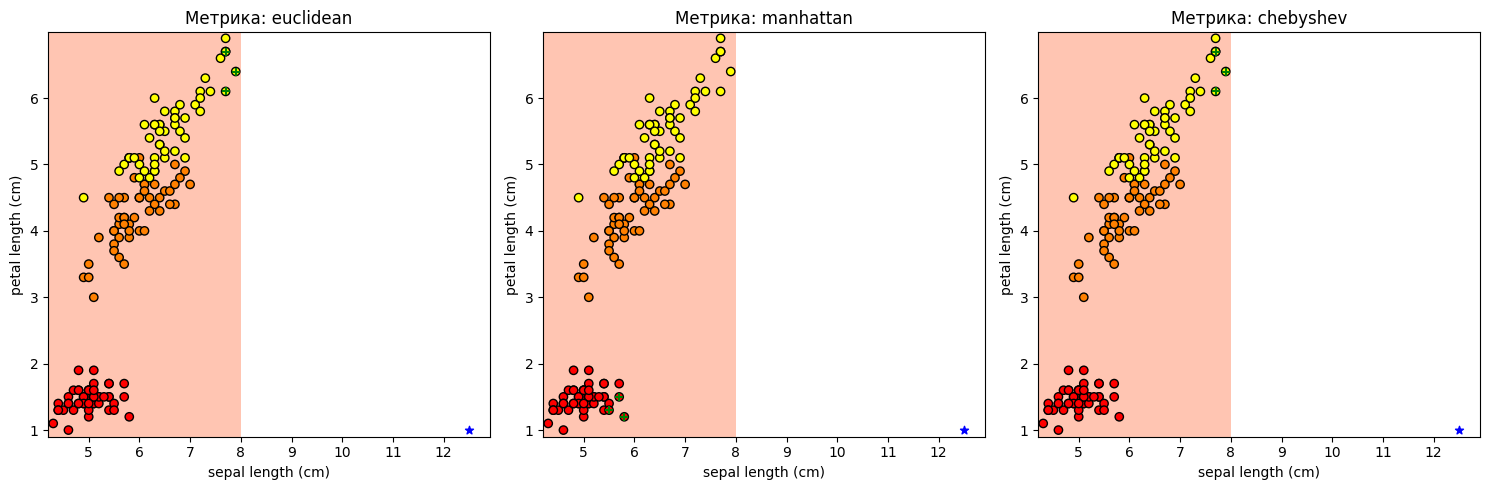

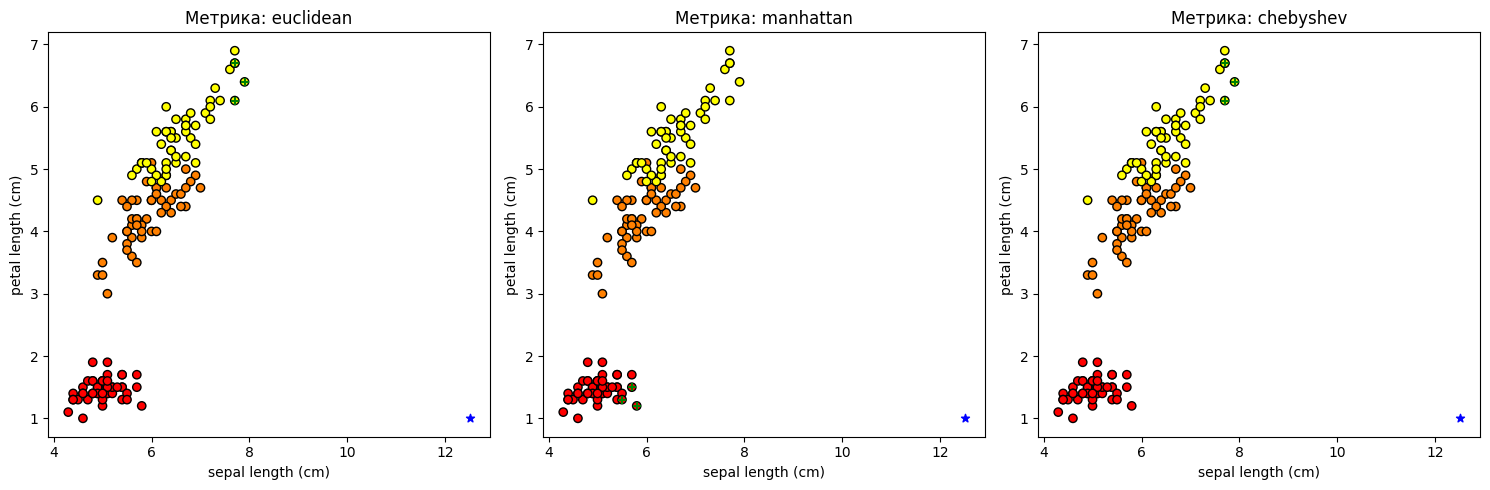

In [18]:
distance_metrics = ['euclidean', 'manhattan', 'chebyshev']
neighbors_indices = []

# Визуализация ближайших соседей при разных метриках расстояния
plt.figure(figsize=(15, 5))
for i, metric in enumerate(distance_metrics, start=1):
    knn = KNeighborsClassifier(n_neighbors=3, metric=metric)
    knn.fit(X_scaled, y)

    # Определение ближайших соседей
    distances, indices = knn.kneighbors(observation_new_scaled)
    neighbors_indices.append(indices)

    plt.subplot(1, 3, i)

    Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='autumn')
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn', edgecolors='k')
    plt.scatter(observation_new[0][0], observation_new[0][1], marker='*', color='b')
    plt.scatter(X[indices[0]][0][0], X[indices[0]][0][1], marker='+', color='g')
    plt.scatter(X[indices[0]][1][0], X[indices[0]][1][1], marker='+', color='g')
    plt.scatter(X[indices[0]][2][0], X[indices[0]][2][1], marker='+', color='g')
    plt.title("Метрика: {}".format(metric))
    plt.xlabel('sepal length (cm)')
    plt.ylabel('petal length (cm)')

plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 5))
for i, metric in enumerate(distance_metrics, start=1):
    plt.subplot(1, 3, i)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='autumn', edgecolors='k')
    plt.scatter(observation_new[0][0], observation_new[0][1], marker='*', color='b')
    for idx in neighbors_indices[i - 1][0]:
        plt.scatter(X[idx][0], X[idx][1], marker='+', color='g')
    plt.title("Метрика: {}".format(metric))
    plt.xlabel('sepal length (cm)')
    plt.ylabel('petal length (cm)')

plt.tight_layout()
plt.show()

**Обучите модель на полном датасете. Сравните ее эффективность с описанной в методических указаниях. Попробуйте разные значения k.**

In [19]:
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

#Нормализация данных
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

k_values = [1, 3, 5, 7, 9]

accuracy_scores = {}

# Обучение модели
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)

    y_pred = knn.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)

    accuracy_scores[k] = accuracy

for k, accuracy in accuracy_scores.items():
    print(f"Accuracy for k={k}: {accuracy:.4f}")

Accuracy for k=1: 1.0000
Accuracy for k=3: 1.0000
Accuracy for k=5: 1.0000
Accuracy for k=7: 1.0000
Accuracy for k=9: 1.0000


**Попробуйте в модели на полном датасете взвешенный алгоритм (аргумент weights объекта KNeighborsClassifier). Сравние его точность с равномерным вариантом.**

In [20]:
accuracy_scores_uniform = {}
accuracy_scores_distance = {}

for k in k_values:
    # Равномерный алгоритм
    knn_uniform = KNeighborsClassifier(n_neighbors=k, weights='uniform')
    knn_uniform.fit(X_train_scaled, y_train)
    y_pred_uniform = knn_uniform.predict(X_test_scaled)
    accuracy_uniform = accuracy_score(y_test, y_pred_uniform)
    accuracy_scores_uniform[k] = accuracy_uniform

    # Взвешенный алгоритм
    knn_distance = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn_distance.fit(X_train_scaled, y_train)
    y_pred_distance = knn_distance.predict(X_test_scaled)
    accuracy_distance = accuracy_score(y_test, y_pred_distance)
    accuracy_scores_distance[k] = accuracy_distance

print("Точность модели с равномерным весом:")
for k, accuracy in accuracy_scores_uniform.items():
    print(f"Accuracy for k={k}: {accuracy:.4f}")

print("\nТочность модели с взвешенным расстоянием:")
for k, accuracy in accuracy_scores_distance.items():
    print(f"Accuracy for k={k}: {accuracy:.4f}")

Точность модели с равномерным весом:
Accuracy for k=1: 1.0000
Accuracy for k=3: 1.0000
Accuracy for k=5: 1.0000
Accuracy for k=7: 1.0000
Accuracy for k=9: 1.0000

Точность модели с взвешенным расстоянием:
Accuracy for k=1: 1.0000
Accuracy for k=3: 1.0000
Accuracy for k=5: 1.0000
Accuracy for k=7: 1.0000
Accuracy for k=9: 1.0000


**Постройте график точности (accuracy) модели в зависимости от значения k. Сделайте вывод**

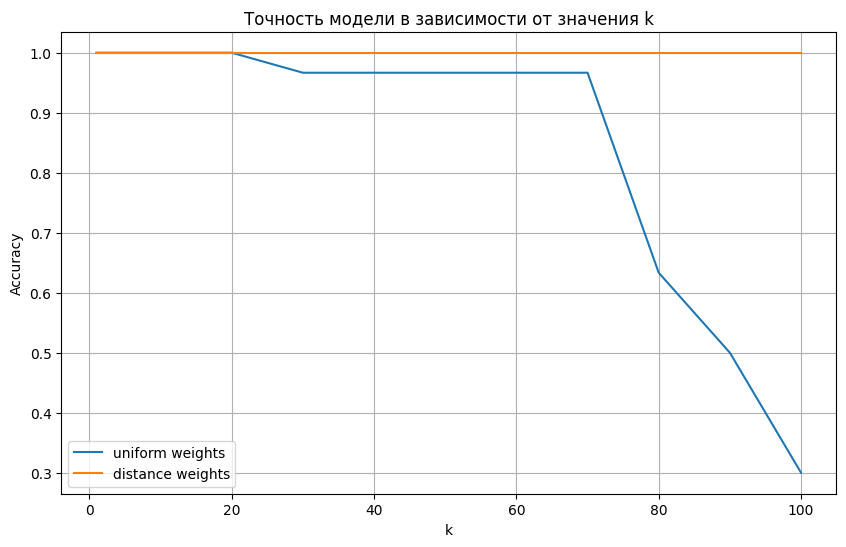

In [21]:
iris = load_iris()

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=42)

# Нормализация данных
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

k_values = [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

# Списки для сохранения точностей моделей
accuracy_uniform = []
accuracy_distance = []

for k in k_values:
    # Равномерный алгоритм
    knn_uniform = KNeighborsClassifier(n_neighbors=k, weights='uniform')
    knn_uniform.fit(X_train_scaled, y_train)
    accuracy_uniform.append(accuracy_score(y_test, knn_uniform.predict(X_test_scaled)))

    # Взвешенный алгоритм
    knn_distance = KNeighborsClassifier(n_neighbors=k, weights='distance')
    knn_distance.fit(X_train_scaled, y_train)
    accuracy_distance.append(accuracy_score(y_test, knn_distance.predict(X_test_scaled)))

plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_uniform, label='uniform weights')
plt.plot(k_values, accuracy_distance, label='distance weights')
plt.title('Точность модели в зависимости от значения k')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

**Выберите датасет и постройте регрессию при помощи метода ближайших соседей.**

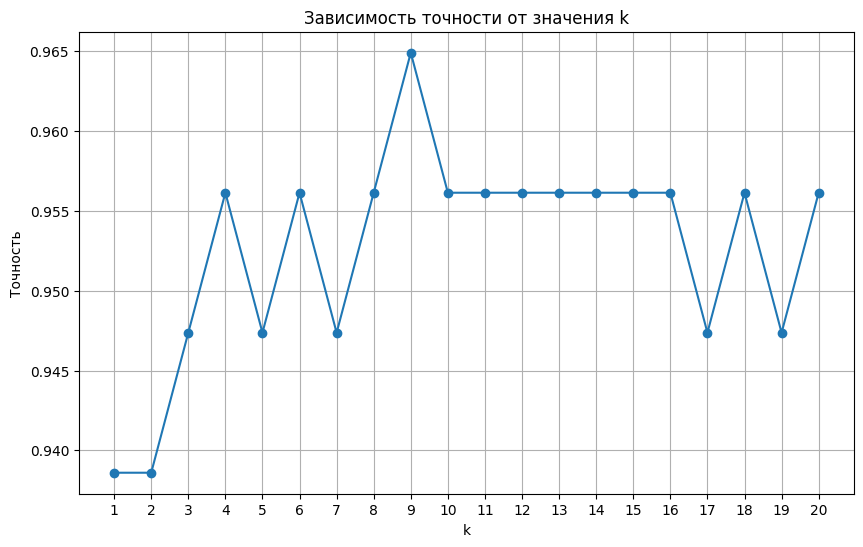

Лучшее значение k: 9
Точность модели: 0.9649122807017544
Отчет о классификации:
              precision    recall  f1-score   support

           0       0.95      0.95      0.95        43
           1       0.97      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114

Матрица ошибок:
[[41  2]
 [ 2 69]]


In [22]:
cancer_data = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer_data.data, cancer_data.target, test_size=0.2, random_state=42)

# Масштабирование признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

k_values = range(1, 21)

accuracy_values = []

# Обучение моделей классификации с разными значениями k
for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train_scaled, y_train)
    y_pred = knn_classifier.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)

# Построение графика зависимости точности от значения k
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_values, marker='o')
plt.title('Зависимость точности от значения k')
plt.xlabel('k')
plt.ylabel('Точность')
plt.xticks(k_values)
plt.grid(True)
plt.show()

# Выбор лучшего значения k (максимальной точности)
best_k = k_values[accuracy_values.index(max(accuracy_values))]
print(f"Лучшее значение k: {best_k}")

# Построение модели с лучшим значением k
best_knn_classifier = KNeighborsClassifier(n_neighbors=best_k)
best_knn_classifier.fit(X_train_scaled, y_train)

y_pred = best_knn_classifier.predict(X_test_scaled)
print("Точность модели:", accuracy_score(y_test, y_pred))
print("Отчет о классификации:")
print(classification_report(y_test, y_pred))
print("Матрица ошибок:")
print(confusion_matrix(y_test, y_pred))